In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from calibration.calibration import FilmCalibration
from calibration.image_processing import template_matching

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True
plt.rcParams['image.cmap'] = 'viridis_r'
plt.rcParams.update({'font.size': 14})

In [3]:
calibracion = FilmCalibration.from_json("calibracion_test.json")

In [4]:
for key, value in calibracion.__dict__.items():
    #print(f"{key}: {value}")
    continue

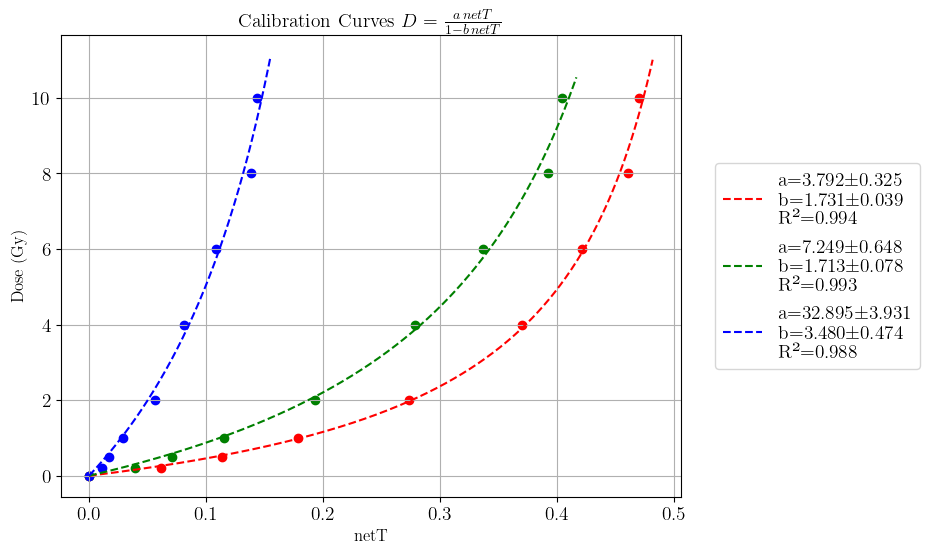

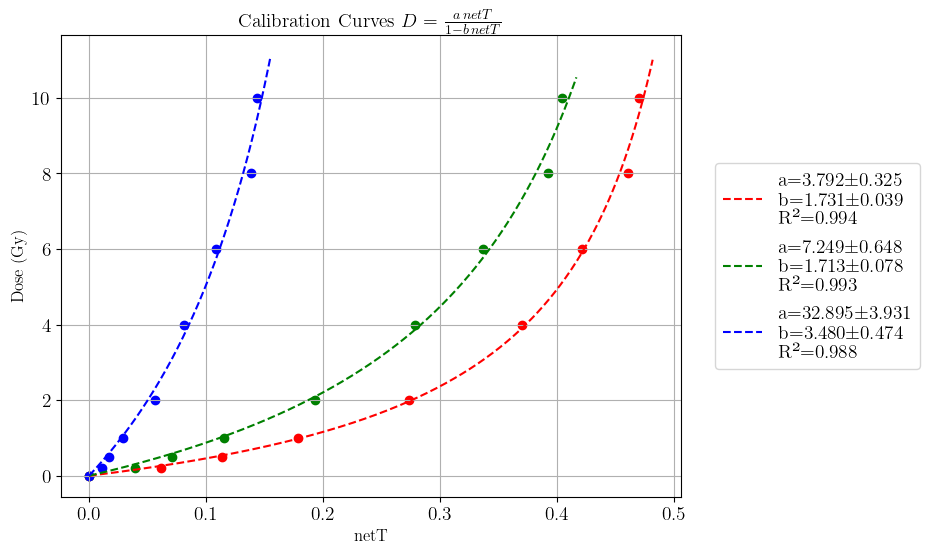

In [5]:
calibracion.graph_calibration_curve()

In [6]:
film_name = "mama100"
film_path = os.path.join("media", f"{film_name}.tif")
tps_name = "mama_TPS.dcm"
tps_path = os.path.join("media", tps_name)
output = os.path.join('media','B_marked_new_test.tif')

Image A dimensions (cm): 20.0 20.0
Image B dimensions (cm): 25.4762 20.3962
Image A resolution: 25.60 px/cm x 25.60 px/cm
Image B resolution: 39.37 px/cm x 39.37 px/cm
Rescaled Image A to: 787x787 pixels
Maximum correlation value: 0.976
Top-left location in transformed image: (119, 13)
Coordinates in the original image for the crop:
  Top-left: (119, 3)
  Bottom-right: (906, 790)
Cropped (flipped and rotated) image saved as media\B_marked_new_test.tif


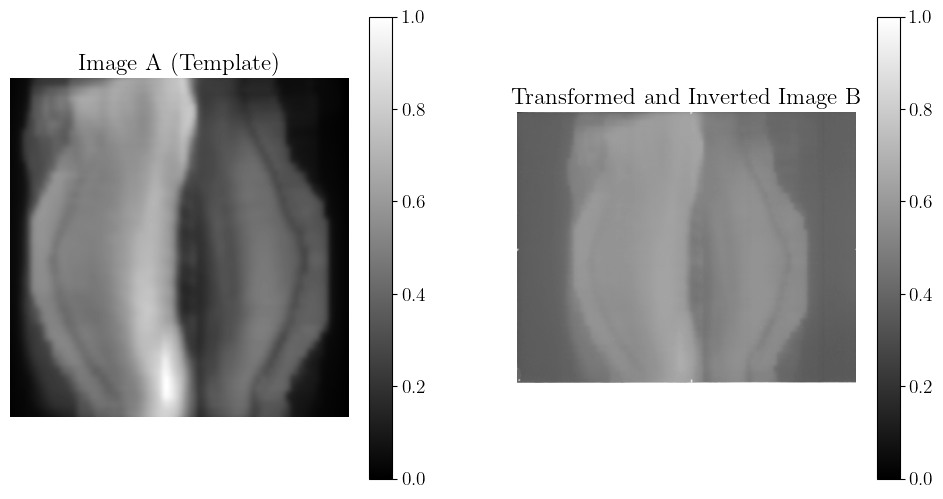

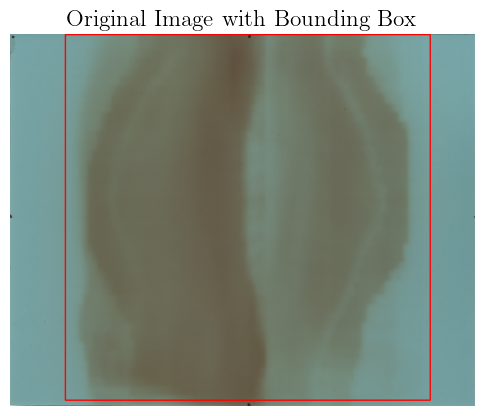

In [7]:
template_matching(tps_path, film_path, output)

In [8]:
film_name = "B_marked_new"
film_path = os.path.join("media", f"{film_name}.tif")

dose_map = calibracion.compute_dose_map(film_path, channel=2)

Bits per channel: 16


In [9]:
dose_map.min()

np.float64(-5.070000913037594)

In [10]:
dose_map.max()

np.float64(0.34711122465503946)

In [11]:
dose_map_original = dose_map.copy()

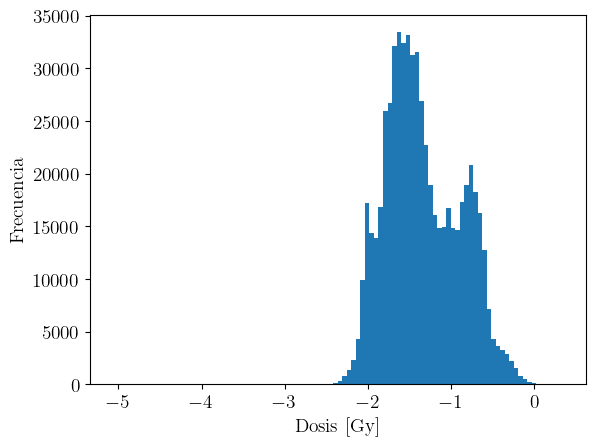

In [12]:
#ver histograma
plt.figure()
plt.hist(dose_map_original.flatten(), bins=100)
plt.xlabel("Dosis [Gy]")
plt.ylabel("Frecuencia")
plt.show()

In [13]:
# filtrar valores mayores de 10 a 0
dose_map[dose_map > 6] = 0

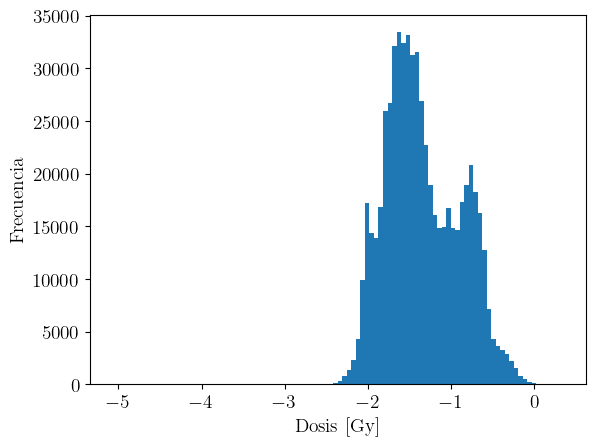

In [14]:
#ver histograma
plt.figure()
plt.hist(dose_map.flatten(), bins=100)
plt.xlabel("Dosis [Gy]")
plt.ylabel("Frecuencia")
plt.show()

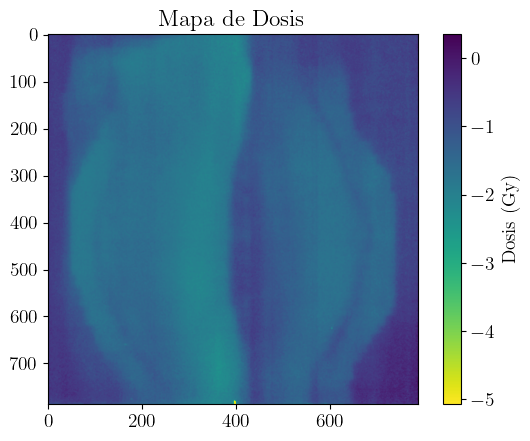

In [15]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map, cmap='viridis_r')
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.show()


Bits per channel: 16
Bits per channel: 16
Bits per channel: 16


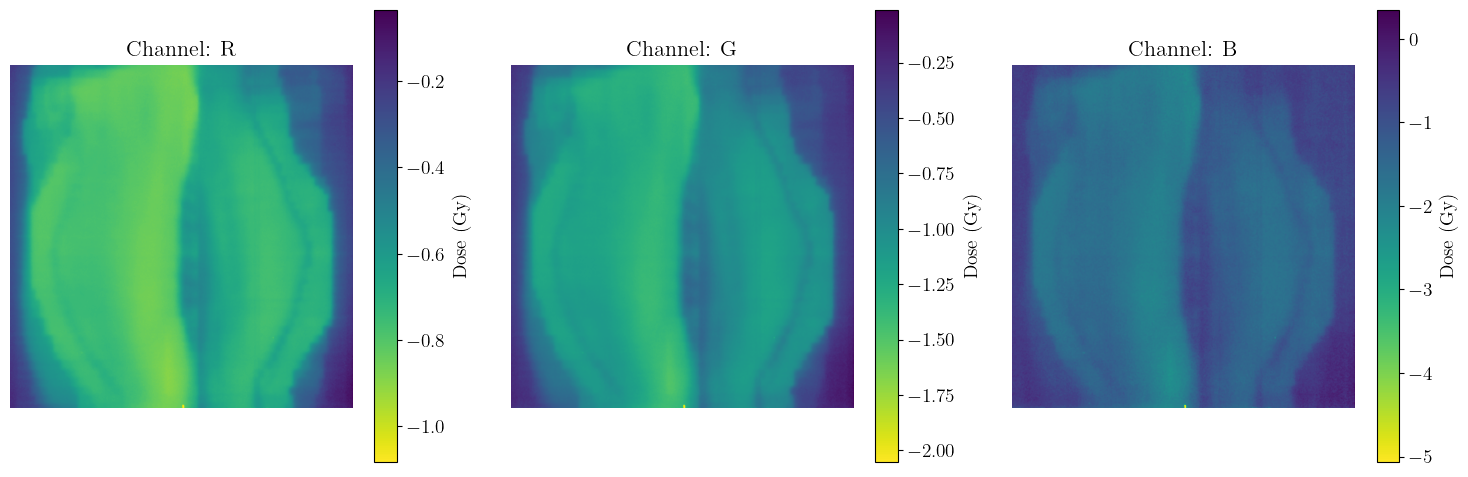

In [16]:
dose_maps = [None]*3
for i in range(3):
    dose_maps[i] = calibracion.compute_dose_map(film_path, channel=i)
    dose_maps[i][dose_maps[i] > 6] = 0

import matplotlib.pyplot as plt

canales = ['R', 'G', 'B']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    # Guardas el objeto de tipo AxesImage que retorna imshow
    im = axs[i].imshow(dose_maps[i], cmap='viridis_r')
    axs[i].set_title(f'Channel: {canales[i]}', fontsize=16)
    # Aquí creas la barra de color para 'im' asociándola al eje axs[i]
    fig.colorbar(im, ax=axs[i], label='Dose (Gy)')
    # O también podrías usar plt.colorbar(im, ax=axs[i], label='Dosis (Gy)')

    # Corrige la llamada a set_axis_off (que es un método y se ejecuta con paréntesis)
    axs[i].set_axis_off()

plt.tight_layout()
plt.show()


In [17]:
aaa

NameError: name 'aaa' is not defined

In [ ]:
# Exportar cadaa uno de los mapas de dosis como mapa de dosis
maps_folder = os.path.join('media', 'maps')
for i in range(3):
    # resize the image to 512x512
    dose_maps[i] = cv2.resize(dose_maps[i], (512, 512), interpolation = cv2.INTER_NEAREST)
    np.save(os.path.join(maps_folder, f'{film_name}_dose_map_channel_{i}.npy'), dose_maps[i])

In [ ]:
film_name= "mama100cropped"

In [ ]:
# Importar los mapas de dosis y graficarlos
canales = ['R', 'G', 'B']
for i in range(3):
    dose_map = np.load(os.path.join(maps_folder, f'{film_name}_dose_map_channel_{i}.npy'))
    plt.imshow(dose_map, cmap='viridis_r')
    plt.colorbar(label='Dose (Gy)')
    # axis off
    plt.axis('off')
    plt.title(f'Dose map generated - Channel {canales[i]}')
    plt.show()